## Load Telemetry Datasets (Original / Replicado)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import random
import numpy as np

random.seed(123)
np.random.seed(123)

drop_columns=['timestamp','memory_usage', 'memory_swap_in','memory_swap_out', 'disk_read_requests','disk_read_bytes','label1', 'label2']
#drop_columns=['timestamp','cpu', 'memory_swap_in','memory_swap_out','disk_write_bytes','disk_read_requests','disk_write_requests','disk_read_bytes','label1', 'label2']
# drop_columns=['timestamp','label1','label2']

# Telemetria Original
dataset_train_ori = pd.read_csv("/home/lucianobf/dev/datasets/dataset_telemetry_original/train/dataset_telemetry_train_original.csv", sep = ',')
dataset_test_ori = pd.read_csv("/home/lucianobf/dev/datasets/dataset_telemetry_original/test/dataset_telemetry_test_original.csv", sep = ',')

y_train_ori = dataset_train_ori['label1']
X_train_ori = dataset_train_ori.drop(columns=drop_columns)

y_test_ori = dataset_test_ori['label1']
X_test_ori = dataset_test_ori.drop(columns=drop_columns)


# Telemetria Replay
dataset_train_replay = pd.read_csv("/home/lucianobf/dev/datasets/dataset_telemetry_replay/train/dataset_telemetry_train_replay.csv", sep = ',')
dataset_test_replay = pd.read_csv("/home/lucianobf/dev/datasets/dataset_telemetry_replay/test/dataset_telemetry_test_replay.csv", sep = ',')

y_train_replay = dataset_train_replay['label1']
X_train_replay = dataset_train_replay.drop(columns=drop_columns)

y_test_replay = dataset_test_replay['label1']
X_test_replay = dataset_test_replay.drop(columns=drop_columns)


feature_names = X_train_ori.columns.values.tolist()

X_train_ori


,cpu,disk_write_requests,disk_write_bytes,network_incoming_bytes,network_outgoing_bytes,network_incoming_packets,network_outgoing_packets
0,19.7,0.0,0.0,1750898.0,31683974.0,19839.0,15255.0
1,15.0,2.0,12288.0,999902.0,18314828.0,11037.0,8501.0
2,19.4,2.0,12288.0,1194532.0,23348445.0,13309.0,10103.0
3,20.2,2.0,12288.0,1458915.0,28803229.0,16447.0,12061.0
4,20.4,2.0,12288.0,1200079.0,21727367.0,13300.0,10061.0
...,...,...,...,...,...,...,...
2181,41.7,2.0,12288.0,3018159.0,61170087.0,34027.0,25453.0
2182,35.2,2.0,12288.0,2289457.0,42336453.0,25329.0,19612.0
2183,38.9,9.0,2203648.0,2777800.0,53591378.0,31070.0,23524.0
2184,38.9,2.0,12288.0,2508552.0,47134581.0,27835.0,21575.0


In [2]:

def info_dataset(X_train, y_train, X_test, y_test, name):
    print(f"X_train.shape: {X_train.shape}")
    print(f"y_train.shape: {y_train.shape}")
    print("")
    print(f"X_test.shape: {X_test.shape}")
    print(f"y_test.shape: {y_test.shape}")

    print("\ny_train classes")
    print(y_train.value_counts())
    print(y_train.value_counts(normalize=True))
    print("\ny_test classes")
    print(y_test.value_counts())
    print(y_test.value_counts(normalize=True))

    plt.cla()
    plt.clf()
    plt.rcParams["axes.titlesize"] = 26
    plt.rc('font', size=26)
    plt.rc('figure', facecolor='white')
    fig, ax = plt.subplots(1,2, figsize=(16,8), linewidth=2, edgecolor="black")
    for a in ax:
        a.set_ylabel("Frequência (%)")
        a.set_xlabel("Classes")
    ((y_train.value_counts()/y_train.count())*100).plot.bar(rot=0, ax=ax[0], color=['tab:red','tab:green'], title="Treino")
    ((y_test.value_counts()/y_test.count())*100).plot.bar(rot=0, ax=ax[1], color=['tab:red','tab:green'], title="Teste")
    plt.suptitle("Dataset de $\mathit{traces}$ de nuvem \n Tráfego "+name, fontsize=26, y=1.1)
    plt.show()

## Info Dataset Original

X_train.shape: (2186, 7)
y_train.shape: (2186,)

X_test.shape: (1143, 7)
y_test.shape: (1143,)

y_train classes
attack    1453
normal     733
Name: label1, dtype: int64
attack    0.664684
normal    0.335316
Name: label1, dtype: float64

y_test classes
attack    770
normal    373
Name: label1, dtype: int64
attack    0.673666
normal    0.326334
Name: label1, dtype: float64


<Figure size 432x288 with 0 Axes>

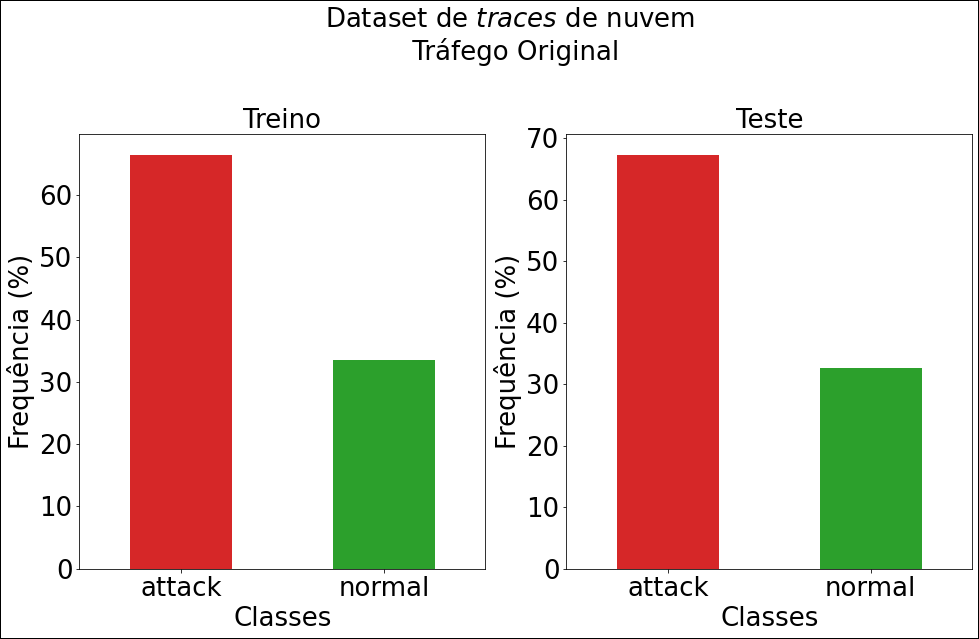

In [3]:
info_dataset(X_train_ori, y_train_ori, X_test_ori, y_test_ori, "Original")

## Info Dataset Replay

X_train.shape: (2230, 7)
y_train.shape: (2230,)

X_test.shape: (1156, 7)
y_test.shape: (1156,)

y_train classes
attack    1472
normal     758
Name: label1, dtype: int64
attack    0.66009
normal    0.33991
Name: label1, dtype: float64

y_test classes
attack    767
normal    389
Name: label1, dtype: int64
attack    0.663495
normal    0.336505
Name: label1, dtype: float64


<Figure size 432x288 with 0 Axes>

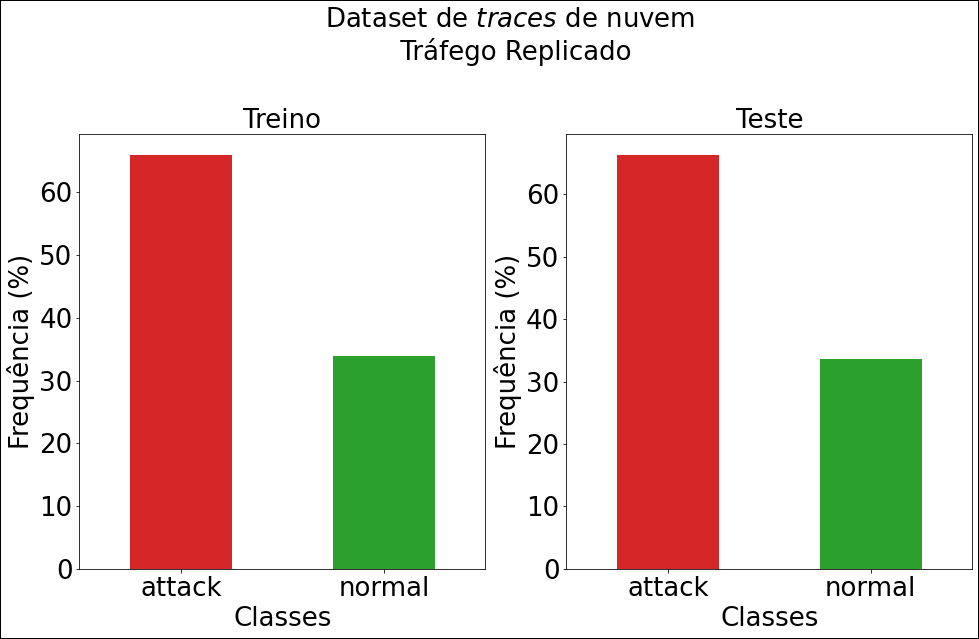

In [4]:
info_dataset(X_train_replay, y_train_replay, X_test_replay, y_test_replay, "Replicado")


## Preprocessing


In [5]:

# Map y (labels) to binary
## original
y_train_ori = y_train_ori.apply(lambda x : 0 if x=="normal" else (1 if x=="attack" else x))
y_test_ori = y_test_ori.apply(lambda x : 0 if x=="normal" else (1 if x=="attack" else x))
## replay
y_train_replay = y_train_replay.apply(lambda x : 0 if x=="normal" else (1 if x=="attack" else x))
y_test_replay = y_test_replay.apply(lambda x : 0 if x=="normal" else (1 if x=="attack" else x))


## StandardScaler

In [6]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler() 
# X_train_ori = scaler.fit_transform(X_train_ori)
# X_train_replay = scaler.fit_transform(X_train_replay)

# X_train_ori

## Feature Importance

In [7]:
#Plot Feature Importances
def plot_feature_importances(feature_names, importances, yerr, dataset):
    forest_importances = pd.Series(importances, index=feature_names)
    plt.cla()
    plt.clf()
    # plt.rcParams["mathtext.fontset"] = 'dejavuserif'
    # plt.rcParams["axes.titlesize"] = 18
    # plt.rcParams["axes.labelsize"] = 16
    # plt.rc('font', size=16)
    plt.rc('figure', facecolor='white')

    fig, ax = plt.subplots(figsize=(10,6), linewidth=2, edgecolor="black")
    forest_importances.plot.bar(yerr=yerr, ax=ax)
    ax.set_title("Importância das Características - "+dataset+" \n Random Forest (MDI)")
    ax.set_ylabel("Diminuição média na impureza")
    plt.xticks(rotation=30, ha='right', rotation_mode='anchor')
    fig.tight_layout()
    plt.show()


## Matriz Confusão

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Plot Confusion Matrix
def plot_confusion_matrix(ytest, ypred, title):
    plt.cla()
    plt.clf()
    plt.rcParams["axes.titlesize"] = 15
    plt.rc('font', size=14)
    plt.rc('figure', facecolor='white')
    disp = ConfusionMatrixDisplay.from_predictions(ytest, ypred, cmap=plt.cm.Blues, normalize='true', values_format='.2f', display_labels=['Normal','Ataque'])
    disp.ax_.set_title("normalização: linhas (real)", size=14)
    disp.figure_.suptitle(title, y=1.1, size=15)
    # xlabels = [item.get_text() for item in disp.ax_.get_xticklabels()]
    # ylabels = [item.get_text() for item in disp.ax_.get_yticklabels()]
    # xlabels[0] = 'normal'
    # xlabels[1] = 'ataque'
    # ylabels[0] = 'normal'
    # ylabels[1] = 'ataque'
    # disp.ax_.set_xticklabels(xlabels)
    # disp.ax_.set_yticklabels(ylabels)
    disp.ax_.set_xlabel("Predito", size=15)
    disp.ax_.set_ylabel("Real", size=15)
    disp.figure_.set_linewidth(2)
    # disp.figure_.set_figwidth(4)
    # disp.figure_.set_figheight(3)
    disp.figure_.set_edgecolor("black")
    plt.show()

## Classifiers

### KNeighborsClassifier

 Acurácia KNN Original: 0.97
Precision KNN Original: 0.97
   Recall KNN Original: 0.99
       F1 KNN Original: 0.98


<Figure size 432x288 with 0 Axes>

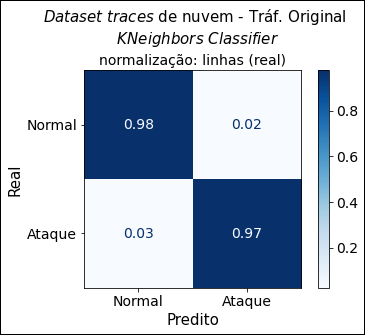

 Acurácia KNN Replicado: 0.97
Precision KNN Replicado: 0.97
   Recall KNN Replicado: 0.99
       F1 KNN Replicado: 0.98


<Figure size 432x288 with 0 Axes>

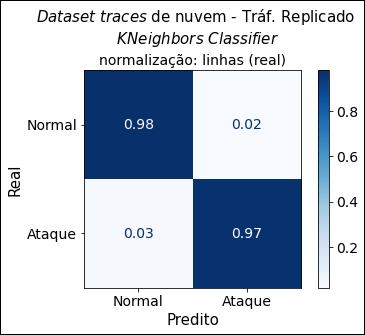

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import random
import numpy as np

random.seed(123)
np.random.seed(123)

# Tráfego Original
modeloKNN = KNeighborsClassifier()
modeloKNN.fit(X_train_ori, y_train_ori)
ypred_ori = modeloKNN.predict(X_test_ori)
print(f" Acurácia KNN Original: {round(accuracy_score(ypred_ori, y_test_ori),2)}")
print(f"Precision KNN Original: {round(precision_score(ypred_ori, y_test_ori),2)}")
print(f"   Recall KNN Original: {round(recall_score(ypred_ori, y_test_ori),2)}")
print(f"       F1 KNN Original: {round(f1_score(ypred_ori, y_test_ori),2)}")

plot_confusion_matrix(ytest=y_test_ori, ypred=ypred_ori,title="$\mathit{Dataset \ traces}$ de nuvem - Tráf. Original \n $\mathit{KNeighbors \ Classifier}$")


# Tráfego Replicado
modeloKNN_REPLAY = KNeighborsClassifier()
modeloKNN_REPLAY.fit(X_train_replay, y_train_replay)
ypred_replay = modeloKNN_REPLAY.predict(X_test_replay)
print(f" Acurácia KNN Replicado: {round(accuracy_score(ypred_replay, y_test_replay),2)}")
print(f"Precision KNN Replicado: {round(precision_score(ypred_replay, y_test_replay),2)}")
print(f"   Recall KNN Replicado: {round(recall_score(ypred_replay, y_test_replay),2)}")
print(f"       F1 KNN Replicado: {round(f1_score(ypred_replay, y_test_replay),2)}")

plot_confusion_matrix(ytest=y_test_replay, ypred=ypred_replay,title="$\mathit{Dataset \ traces}$ de nuvem - Tráf. Replicado \n $\mathit{KNeighbors \ Classifier}$")

In [10]:
# print("Replay Train")
# print(y_train_replay.value_counts())
# print("\nReplay Test")
# print(y_test_replay.value_counts())

### RandomForestClassifier

 Acurácia RF Original: 0.99
Precision RF Original: 1.0
   Recall RF Original: 0.99
       F1 RF Original: 1.0


<Figure size 432x288 with 0 Axes>

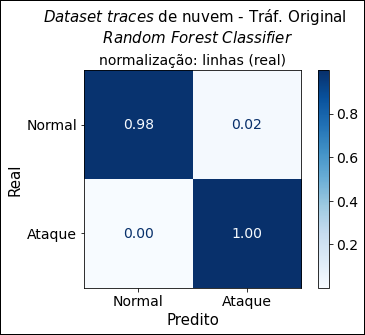


 Acurácia RF Replicado: 1.0
Precision RF Replicado: 1.0
   Recall RF Replicado: 0.99
       F1 RF Replicado: 1.0


<Figure size 432x288 with 0 Axes>

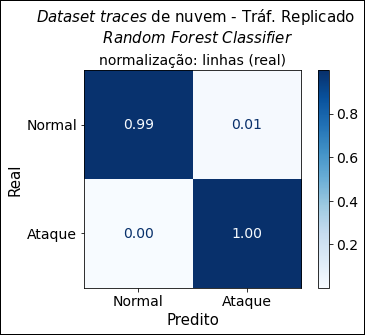

In [11]:
from logging import critical
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import random
import numpy as np

random.seed(123)
np.random.seed(123)


# Tráfego Original
modeloRF_ORI = RandomForestClassifier()
modeloRF_ORI.fit(X_train_ori, y_train_ori)
ypred_ori = modeloRF_ORI.predict(X_test_ori)
print(f" Acurácia RF Original: {round(accuracy_score(ypred_ori, y_test_ori),2)}")
print(f"Precision RF Original: {round(precision_score(ypred_ori, y_test_ori),2)}")
print(f"   Recall RF Original: {round(recall_score(ypred_ori, y_test_ori),2)}")
print(f"       F1 RF Original: {round(f1_score(ypred_ori, y_test_ori),2)}")

plot_confusion_matrix(ytest=y_test_ori, ypred=ypred_ori,title="$\mathit{Dataset \ traces}$ de nuvem - Tráf. Original \n $\mathit{Random \ Forest \ Classifier}$")

importances_ORI = modeloRF_ORI.feature_importances_
std_ORI = np.std([tree.feature_importances_ for tree in modeloRF_ORI.estimators_], axis=0)
# plot_feature_importances(feature_names=feature_names, importances=importances_ORI, yerr=std_ORI, dataset="Telemetria Original")



# Tráfego Replicado
print("")
modeloRF_REPLAY = RandomForestClassifier()
modeloRF_REPLAY.fit(X_train_replay, y_train_replay)
ypred_replay = modeloRF_REPLAY.predict(X_test_replay)
print(f" Acurácia RF Replicado: {round(accuracy_score(ypred_replay, y_test_replay),2)}")
print(f"Precision RF Replicado: {round(precision_score(ypred_replay, y_test_replay),2)}")
print(f"   Recall RF Replicado: {round(recall_score(ypred_replay, y_test_replay),2)}")
print(f"       F1 RF Replicado: {round(f1_score(ypred_replay, y_test_replay),2)}")

plot_confusion_matrix(ytest=y_test_replay, ypred=ypred_replay,title="$\mathit{Dataset \ traces}$ de nuvem - Tráf. Replicado \n $\mathit{Random \ Forest \ Classifier}$")

importances_REPLAY = modeloRF_REPLAY.feature_importances_
std_REPLAY = np.std([tree.feature_importances_ for tree in modeloRF_REPLAY.estimators_], axis=0)
# plot_feature_importances(feature_names=feature_names, importances=importances_REPLAY, yerr=std_REPLAY, dataset="Telemetria Tráfego Replicado")

### LogisticRegression

 Acurácia LR Original: 1.0
Precision LR Original: 1.0
   Recall LR Original: 1.0
       F1 LR Original: 1.0


<Figure size 432x288 with 0 Axes>

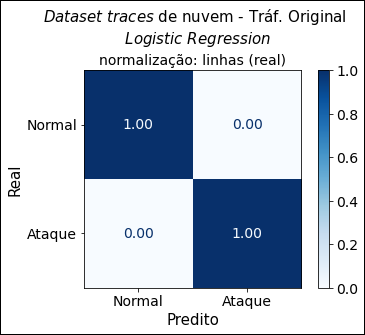


 Acurácia LR Replicado: 1.0
Precision LR Replicado: 1.0
   Recall LR Replicado: 1.0
       F1 LR Replicado: 1.0


<Figure size 432x288 with 0 Axes>

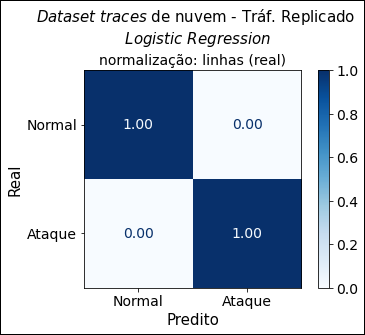

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import random
import numpy as np

random.seed(123)
np.random.seed(123)


# Tráfego Original
modeloLR_ORI = LogisticRegression(max_iter=1000)
modeloLR_ORI.fit(X_train_ori, y_train_ori)
ypred_ori = modeloLR_ORI.predict(X_test_ori)
print(f" Acurácia LR Original: {round(accuracy_score(ypred_ori, y_test_ori),2)}")
print(f"Precision LR Original: {round(precision_score(ypred_ori, y_test_ori),2)}")
print(f"   Recall LR Original: {round(recall_score(ypred_ori, y_test_ori),2)}")
print(f"       F1 LR Original: {round(f1_score(ypred_ori, y_test_ori),2)}")


plot_confusion_matrix(ytest=y_test_ori, ypred=ypred_ori,title="$\mathit{Dataset \ traces}$ de nuvem - Tráf. Original \n $\mathit{Logistic \ Regression}$")


# Tráfego Replicado
print("")
modeloLR_REPLAY = LogisticRegression(max_iter=1000)
modeloLR_REPLAY.fit(X_train_replay, y_train_replay)
ypred_replay = modeloLR_REPLAY.predict(X_test_replay)
print(f" Acurácia LR Replicado: {round(accuracy_score(ypred_replay, y_test_replay),2)}")
print(f"Precision LR Replicado: {round(precision_score(ypred_replay, y_test_replay),2)}")
print(f"   Recall LR Replicado: {round(recall_score(ypred_replay, y_test_replay),2)}")
print(f"       F1 LR Replicado: {round(f1_score(ypred_replay, y_test_replay),2)}")


plot_confusion_matrix(ytest=y_test_replay, ypred=ypred_replay,title="$\mathit{Dataset \ traces}$ de nuvem - Tráf. Replicado \n $\mathit{Logistic \ Regression}$")



### Naive Bayes

GaussianNB
   Acurácia GNB Original: 0.7
  Precision GNB Original: 0.86
     Recall GNB Original: 0.74
         F1 GNB Original: 0.8


<Figure size 432x288 with 0 Axes>

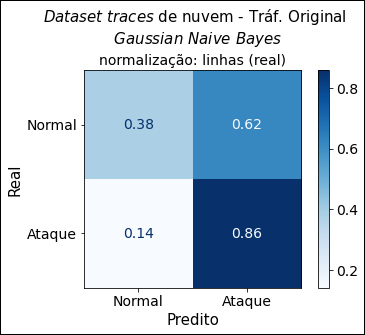


GaussianNB
   Acurácia GNB Replicado: 0.87
  Precision GNB Replicado: 0.95
     Recall GNB Replicado: 0.87
         F1 GNB Replicado: 0.91


<Figure size 432x288 with 0 Axes>

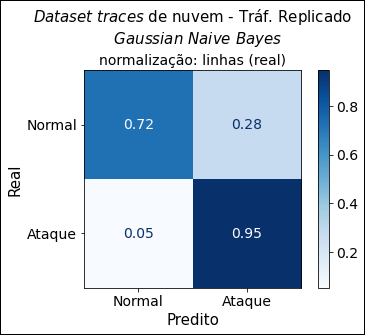

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import random
import numpy as np

random.seed(123)
np.random.seed(123)


# Tráfego Original
modeloGNB_ORI = GaussianNB()
modeloGNB_ORI.fit(X_train_ori, y_train_ori)
ypred_ori = modeloGNB_ORI.predict(X_test_ori)
print(f"GaussianNB")
print(f"   Acurácia GNB Original: {round(accuracy_score(ypred_ori, y_test_ori),2)}")
print(f"  Precision GNB Original: {round(precision_score(ypred_ori, y_test_ori),2)}")
print(f"     Recall GNB Original: {round(recall_score(ypred_ori, y_test_ori),2)}")
print(f"         F1 GNB Original: {round(f1_score(ypred_ori, y_test_ori),2)}")

plot_confusion_matrix(ytest=y_test_ori, ypred=ypred_ori,title="$\mathit{Dataset \ traces}$ de nuvem - Tráf. Original \n $\mathit{Gaussian \ Naive \ Bayes}$")

print("")

# Tráfego Original
modeloGNB_REPLAY = GaussianNB()
modeloGNB_REPLAY.fit(X_train_replay, y_train_replay)
ypred_replay = modeloGNB_REPLAY.predict(X_test_replay)
print(f"GaussianNB")
print(f"   Acurácia GNB Replicado: {round(accuracy_score(ypred_replay, y_test_replay),2)}")
print(f"  Precision GNB Replicado: {round(precision_score(ypred_replay, y_test_replay),2)}")
print(f"     Recall GNB Replicado: {round(recall_score(ypred_replay, y_test_replay),2)}")
print(f"         F1 GNB Replicado: {round(f1_score(ypred_replay, y_test_replay),2)}")

plot_confusion_matrix(ytest=y_test_replay, ypred=ypred_replay,title="$\mathit{Dataset \ traces}$ de nuvem - Tráf. Replicado  \n $\mathit{Gaussian \ Naive \ Bayes}$")

### SVM SVC

 Acurácia SVM Original: 0.88
Precision SVM Original: 0.88
   Recall SVM Original: 0.94
       F1 SVM Original: 0.91


<Figure size 432x288 with 0 Axes>

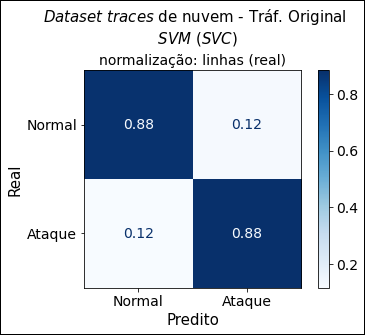


 Acurácia SVM Replicado: 0.92
Precision SVM Replicado: 0.87
   Recall SVM Replicado: 1.0
       F1 SVM Replicado: 0.93


<Figure size 432x288 with 0 Axes>

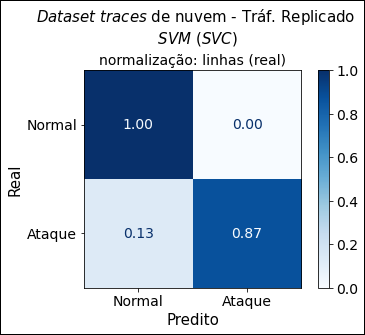

In [14]:
#from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import random
import numpy as np

random.seed(123)
np.random.seed(123)


# Tráfego Original
# modeloSVM_ORI = LinearSVC(max_iter=10000000)
modeloSVM_ORI = SVC()
modeloSVM_ORI.fit(X_train_ori, y_train_ori)
ypred_ori = modeloSVM_ORI.predict(X_test_ori)
print(f" Acurácia SVM Original: {round(accuracy_score(ypred_ori, y_test_ori),2)}")
print(f"Precision SVM Original: {round(precision_score(ypred_ori, y_test_ori),2)}")
print(f"   Recall SVM Original: {round(recall_score(ypred_ori, y_test_ori),2)}")
print(f"       F1 SVM Original: {round(f1_score(ypred_ori, y_test_ori),2)}")


plot_confusion_matrix(ytest=y_test_ori, ypred=ypred_ori,title="$\mathit{Dataset \ traces}$ de nuvem - Tráf. Original \n $\mathit{SVM \ (SVC)}$")


# Tráfego Replicado
print("")
# modeloSVM_REPLAY = LinearSVC(max_iter=10000000)
modeloSVM_REPLAY = SVC()
modeloSVM_REPLAY.fit(X_train_replay, y_train_replay)
ypred_replay = modeloSVM_REPLAY.predict(X_test_replay)
print(f" Acurácia SVM Replicado: {round(accuracy_score(ypred_replay, y_test_replay),2)}")
print(f"Precision SVM Replicado: {round(precision_score(ypred_replay, y_test_replay),2)}")
print(f"   Recall SVM Replicado: {round(recall_score(ypred_replay, y_test_replay),2)}")
print(f"       F1 SVM Replicado: {round(f1_score(ypred_replay, y_test_replay),2)}")


plot_confusion_matrix(ytest=y_test_replay, ypred=ypred_replay,title="$\mathit{Dataset \ traces}$ de nuvem - Tráf. Replicado \n $\mathit{SVM \ (SVC)}$")

